#### Анализ текущего уровня потребительской лояльности клиентов телекоммуникационной компании

Дата исследования – январь 2023 года

#### Цели анализа:
- Определить уровень лояльности клиентов

- Оценить, как распределены участники опроса по городам, полу и возрасту

- Выявить NPS среди всех опрошенных

- Описать клиентов, которые относятся к группе cторонников

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [2]:
path_to_db = '/datasets/telecomm_csi.db'
engine = create_engine(f'sqlite:///{path_to_db}', echo = False)

In [3]:
query = """
   SELECT u.user_id,
           u.lt_day AS lt_day,
           CASE
               WHEN u.lt_day < 365 THEN 'new'
               ELSE 'old'
           END AS is_new,
           u.age,
           CASE
               WHEN u.gender_segment = 0 THEN 'женщина'
               WHEN u.gender_segment = 1 THEN 'мужчина'
               ELSE 'без пола'
           END AS gender_segment,
           u.os_name,
           u.cpe_type_name,
           l.country,
           l.city,
           SUBSTR(ags.title, 4, 5) AS age_segment,
           SUBSTR(ts.title, 4, 8) AS traffic_segment,
           SUBSTR(ls.title, 4, 8) AS lifetime_segment,
           u.nps_score,
           CASE
               WHEN u.nps_score >= 9 THEN 'cторонники'
               WHEN u.nps_score <= 6 THEN 'критики'
               ELSE 'нейтралы'
           END AS nps_score_group
          
    FROM user AS u
    JOIN location AS l ON u.location_id=l.location_id
    JOIN age_segment AS ags ON u.age_gr_id=ags.age_gr_id
    JOIN traffic_segment AS ts ON u.tr_gr_id=ts.tr_gr_id
    JOIN lifetime_segment AS ls ON u.lt_gr_id=ls.lt_gr_id
    WHERE CAST(lt_day AS INTEGER) > 0;
"""
 
    
    
df = pd.read_sql(query, engine)
df.head(3)

,user_id,lt_day,is_new,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_score_group
0,A001A2,2320,old,45.0,мужчина,ANDROID,SMARTPHONE,Россия,Уфа,45-54,1-5,36+,10,cторонники
1,A001WF,2344,old,53.0,женщина,ANDROID,SMARTPHONE,Россия,Киров,45-54,1-5,36+,10,cторонники
2,A003Q7,467,old,57.0,женщина,ANDROID,SMARTPHONE,Россия,Москва,55-64,20-25,13-24,10,cторонники


In [4]:
df.to_csv('telecomm_csi_tableau.csv', index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502476 entries, 0 to 502475
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           502476 non-null  object 
 1   lt_day            502476 non-null  int64  
 2   is_new            502476 non-null  object 
 3   age               501939 non-null  float64
 4   gender_segment    502476 non-null  object 
 5   os_name           502476 non-null  object 
 6   cpe_type_name     502476 non-null  object 
 7   country           502476 non-null  object 
 8   city              502476 non-null  object 
 9   age_segment       502476 non-null  object 
 10  traffic_segment   502476 non-null  object 
 11  lifetime_segment  502476 non-null  object 
 12  nps_score         502476 non-null  int64  
 13  nps_score_group   502476 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 53.7+ MB


In [6]:
df.isnull().sum().sort_values()

user_id               0
lt_day                0
is_new                0
gender_segment        0
os_name               0
cpe_type_name         0
country               0
city                  0
age_segment           0
traffic_segment       0
lifetime_segment      0
nps_score             0
nps_score_group       0
age                 537
dtype: int64

lifetime_segment                   1     13-24         2     25-36         3  \
gender_segment age_segment                                                     
без пола       16-24             NaN  0.444444  0.058824  0.000000  0.500000   
               25-34             NaN  0.294118  0.380435  0.000000  0.151515   
               35-44             NaN  0.095238  0.466667  0.000000  0.333333   
               45-54             NaN -1.000000  0.769231       NaN  0.714286   
               55-64             NaN       NaN       NaN       NaN       NaN   
               66 +              NaN  1.000000       NaN  0.000000       NaN   
               n/a          0.600000 -0.466667 -0.538462 -0.607843 -0.529412   
               до 16             NaN       NaN -1.000000       NaN  0.000000   
женщина        16-24             NaN  0.059398  0.182390 -0.030520  0.211240   
               25-34        0.000000  0.153785  0.285943  0.087561  0.291468   
               35-44        0.333333  0.308812  0.371588  0.217884  0.400000   
               45-54        1.000000  0.376032  0.536913  0.311503  0.493590   
               55-64        1.000000  0.427167  0.393548  0.392430  0.540146   
               66 +              NaN  0.473451  0.673913  0.387205  0.696970   
               n/a               NaN -0.333333 -1.000000 -1.000000       NaN   
               до 16             NaN  0.041096  0.000000 -0.092308  0.357143   
мужчина        16-24             NaN  0.087361  0.245045  0.019798  0.236111   
               25-34        1.000000  0.214059  0.316308  0.145153  0.359766   
               35-44        0.333333  0.332435  0.450846  0.277917  0.431775   
               45-54        1.000000  0.438341  0.516770  0.360275  0.584877   
               55-64             NaN  0.518766  0.644828  0.475520  0.555066   
               66 +              NaN  0.565394  0.540000  0.559633  0.531915   
               n/a          1.000000  0.500000       NaN -0.333333       NaN   
               до 16             NaN  0.017857  0.500000  0.076923  0.111111   

lifetime_segment                 36+       4-6      7-12  
gender_segment age_segment                                
без пола       16-24       -0.500000  0.000000  0.571429  
               25-34        0.083333  0.489362  0.047619  
               35-44       -0.181818  0.333333  0.833333  
               45-54       -0.500000  0.500000  0.000000  
               55-64       -1.000000  1.000000       NaN  
               66 +        -1.000000       NaN       NaN  
               n/a         -0.584459 -0.476190 -0.611111  
               до 16             NaN       NaN       NaN  
женщина        16-24       -0.104258  0.205832  0.186634  
               25-34       -0.042019  0.274569  0.237321  
               35-44        0.100904  0.375661  0.368573  
               45-54        0.223342  0.417763  0.448566  
               55-64        0.334850  0.572482  0.469546  
               66 +         0.437282  0.573913  0.544444  
               n/a         -0.538462 -0.500000 -1.000000  
               до 16       -0.286765  0.058824  0.000000  
мужчина        16-24       -0.065762  0.271100  0.164977  
               25-34        0.027744  0.319668  0.291300  
               35-44        0.175038  0.449479  0.390759  
               45-54        0.300104  0.546698  0.484736  
               55-64        0.417602  0.584660  0.583396  
               66 +         0.536269  0.537143  0.640898  
               n/a         -0.285714       NaN  1.000000  
               до 16       -0.106383  0.222222  0.200000

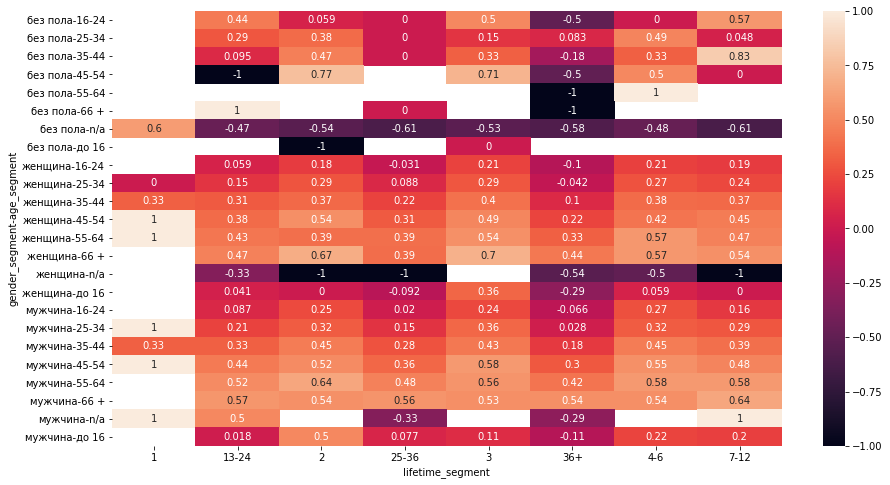

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
d = df.assign(total_nps=lambda row: row['nps_score_group'].map({'cторонники': 1, 'нейтралы': 0, 'критики': -1}))\
  .pivot_table(index=['gender_segment', 'age_segment'], columns=['lifetime_segment'], values='total_nps', aggfunc='mean')
display(d)
plt.figure(figsize=(15,8))
sns.heatmap(d, annot=True);